In [1]:
from google.colab import files
files.upload()

Saving Question 2 Student DATA.csv to Question 2 Student DATA.csv


{'Question 2 Student DATA.csv': b'\xef\xbb\xbfSTUDENT ID,Age,Gender,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,married,salary,Transportation to the university,Accommodation,Mother education, Fathers education,siblings,Parental status,Mothers occupation,Father occupation:,Weekly study hours,Reading frequency( nonscientific books),Reading frequency (scientific books),Attendance to the seminars/conferences,Impact of your projects/activities,Attendance to classes,Preparation for midterm exams 1,Preparation for midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success,CGPA last sem,expected CGPA\r\nSTUDENT1,22,M,other,3,1,2,no,150,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,1,1\r\nSTUDENT2,22,M,other,3,1,2,no,150,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,3\r\nSTUDENT3,22,M,state,3,2,2,no,240,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,2,2\r\nSTUDENT4,18,F,private,3,1,2,yes,245,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Question 2 Student DATA.csv')
df.head()

,STUDENT ID,Age,Gender,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,married,salary,Transportation to the university,...,Attendance to the seminars/conferences,Impact of your projects/activities,Attendance to classes,Preparation for midterm exams 1,Preparation for midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success,CGPA last sem,expected CGPA
0,STUDENT1,22.0,M,other,3,1,2,no,150.0,1,...,1,1,1,1.0,1,3,2,1,1,1
1,STUDENT2,22.0,M,other,3,1,2,no,150.0,1,...,1,1,1,1.0,1,3,2,3,2,3
2,STUDENT3,22.0,M,state,3,2,2,no,240.0,4,...,1,1,1,1.0,1,2,2,1,2,2
3,STUDENT4,18.0,F,private,3,1,2,yes,245.0,1,...,1,1,1,1.0,2,3,2,2,3,2
4,STUDENT5,23.0,M,private,3,2,2,yes,300.0,1,...,1,1,1,2.0,1,2,2,2,2,2


In [6]:
data = df[['Attendance to the seminars/conferences', 'Taking notes in classes', 'Reading frequency (scientific books)', 'CGPA last sem']]
data

,Attendance to the seminars/conferences,Taking notes in classes,Reading frequency (scientific books),CGPA last sem
0,1,3,2,1
1,1,3,2,2
2,1,2,2,2
3,1,3,2,3
4,1,2,1,2
...,...,...,...,...
140,1,2,2,3
141,2,3,2,5
142,1,3,2,4
143,1,2,1,5


In [7]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

duplicates = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

summary = data.describe()
print("\nSummary Statistics:\n", summary)

Missing Values:
 Attendance to the seminars/conferences    0
Taking notes in classes                   0
Reading frequency (scientific books)      0
CGPA last sem                             0
dtype: int64

Number of Duplicate Rows: 104

Summary Statistics:
        Attendance to the seminars/conferences  Taking notes in classes  \
count                              145.000000               145.000000   
mean                                 1.213793                 2.544828   
std                                  0.411404                 0.564940   
min                                  1.000000                 1.000000   
25%                                  1.000000                 2.000000   
50%                                  1.000000                 3.000000   
75%                                  1.000000                 3.000000   
max                                  2.000000                 3.000000   

       Reading frequency (scientific books)  CGPA last sem  
count        

In [13]:
# Preprocessing

global_mean = data.mean()

# Z-Score Normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (41) found smaller than n_clusters (42). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (41) found smaller than n_clusters (43). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (41) found smaller than n_clusters (44). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (41) found smaller than n_clusters (45). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/

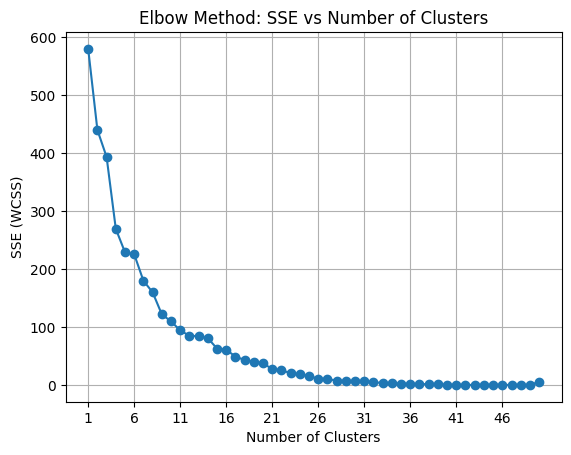

In [14]:
# Using Elbow Method To Find Optimal K

sse_scores = []

for i in range(1, 51):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    wcss = sum(np.sum((data_scaled[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
    sse_scores.append(wcss)

plt.plot(range(1, 51), sse_scores, marker='o', linestyle='-')
plt.title("Elbow Method: SSE vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (WCSS)")
plt.xticks(range(1, 51, 5))
plt.grid(True)
plt.show()


In [21]:
# Applying K-means

# K = 21

start_time = time.time()

kmeans = KMeans(n_clusters=21)
kmeans.fit(data_scaled)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

wcss = sum(np.sum((data_scaled[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(data_scaled[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(data_scaled, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print("Number of iterations:", kmeans.n_iter_)
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")


Execution Time: 0.0084 seconds
Number of iterations: 2
WCSS = 28.1427
BCSS = 3707.7883
SSE: 3735.9310
Silhouette Score: 0.6905



In [25]:
# Applying K-means

# K = 26

start_time = time.time()

kmeans = KMeans(n_clusters=26)
kmeans.fit(data_scaled)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

wcss = sum(np.sum((data_scaled[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(data_scaled[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(data_scaled, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print("Number of iterations:", kmeans.n_iter_)
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")


Execution Time: 0.0092 seconds
Number of iterations: 2
WCSS = 13.1783
BCSS = 3722.7527
SSE: 3735.9310
Silhouette Score: 0.8327



In [29]:
# Applying K-means

# K = 30

start_time = time.time()

kmeans = KMeans(n_clusters=30)
kmeans.fit(data_scaled)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

wcss = sum(np.sum((data_scaled[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(data_scaled[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(data_scaled, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print("Number of iterations:", kmeans.n_iter_)
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")


Execution Time: 0.0114 seconds
Number of iterations: 2
WCSS = 6.8034
BCSS = 3729.1276
SSE: 3735.9310
Silhouette Score: 0.8796




Execution Time: 0.0031 seconds
Silhouette Score: 0.5337


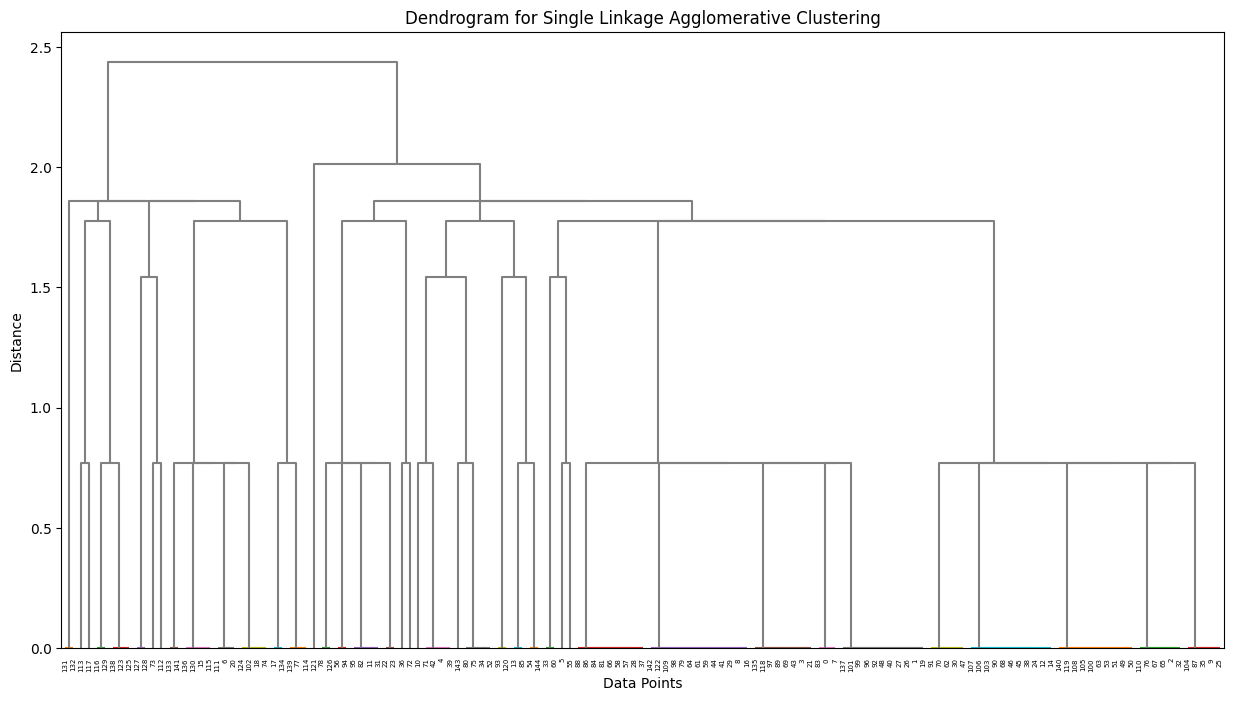

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Single-Link Agglomerative Clustering (k = 22)

start_time = time.time()

single_link = AgglomerativeClustering(n_clusters=22, linkage='single', compute_distances=True)
single_link.fit(data_scaled)

labels = single_link.labels_
linked = linkage(data_scaled, method='single')

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(data_scaled, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=np.arange(len(data_scaled)), truncate_mode="level", p=22, color_threshold=0.2 * max(linked[:, 2]), above_threshold_color='gray')
plt.title("Dendrogram for Single Linkage Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Execution Time: 0.0034 seconds
Silhouette Score: 0.5686


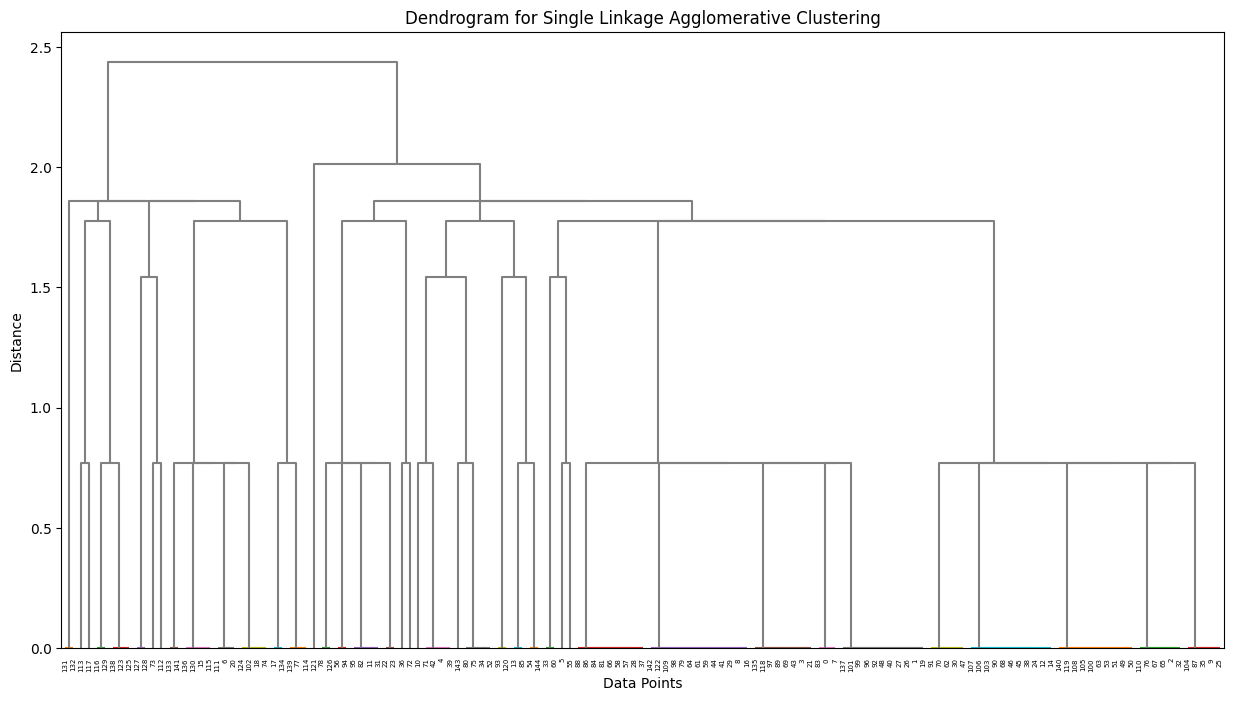

In [37]:
# Single-Link Agglomerative Clustering (k = 26)

start_time = time.time()

single_link = AgglomerativeClustering(n_clusters=26, linkage='single', compute_distances=True)
single_link.fit(data_scaled)

labels = single_link.labels_
linked = linkage(data_scaled, method='single')

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(data_scaled, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=np.arange(len(data_scaled)), truncate_mode="level", p=26, color_threshold=0.2 * max(linked[:, 2]), above_threshold_color='gray')
plt.title("Dendrogram for Single Linkage Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Execution Time: 0.0032 seconds
Silhouette Score: 0.6795


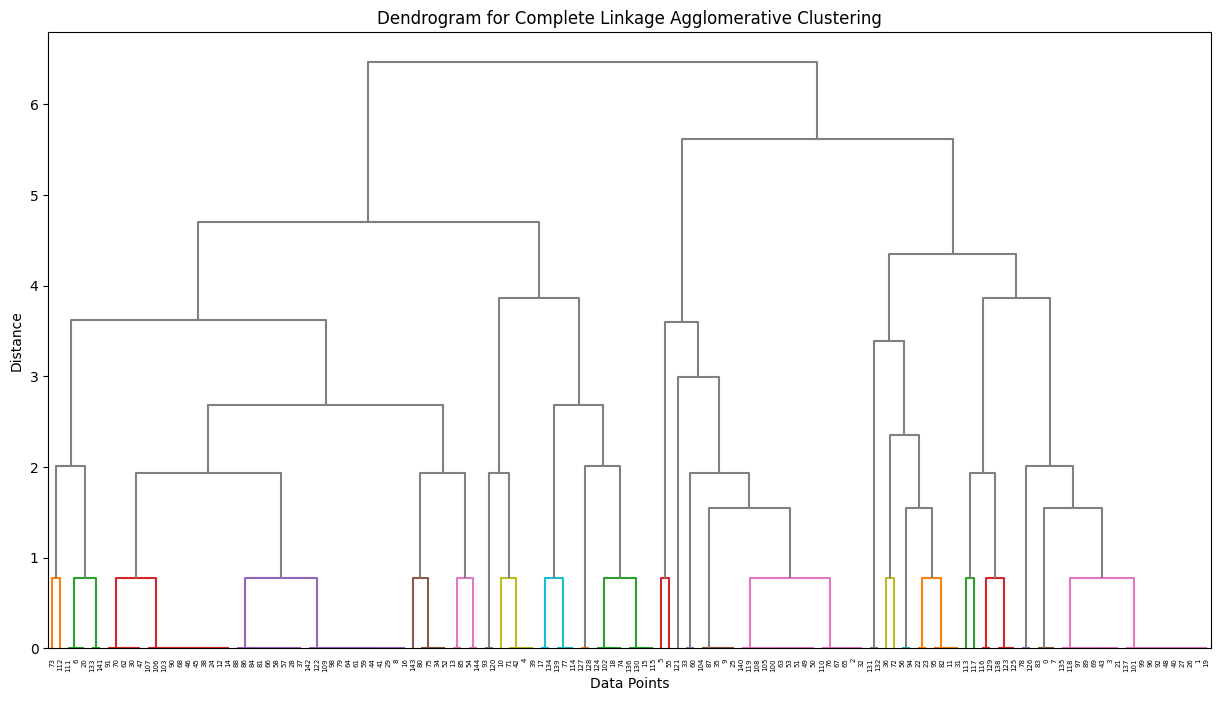

In [38]:
# Complete-Link Agglomerative Clustering (k = 22)

start_time = time.time()

single_link = AgglomerativeClustering(n_clusters=22, linkage='complete', compute_distances=True)
single_link.fit(data_scaled)

labels = single_link.labels_
linked = linkage(data_scaled, method='complete')

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(data_scaled, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=np.arange(len(data_scaled)), truncate_mode="level", p=22, color_threshold=0.2 * max(linked[:, 2]), above_threshold_color='gray')
plt.title("Dendrogram for Complete Linkage Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Execution Time: 0.0037 seconds
Silhouette Score: 0.7185


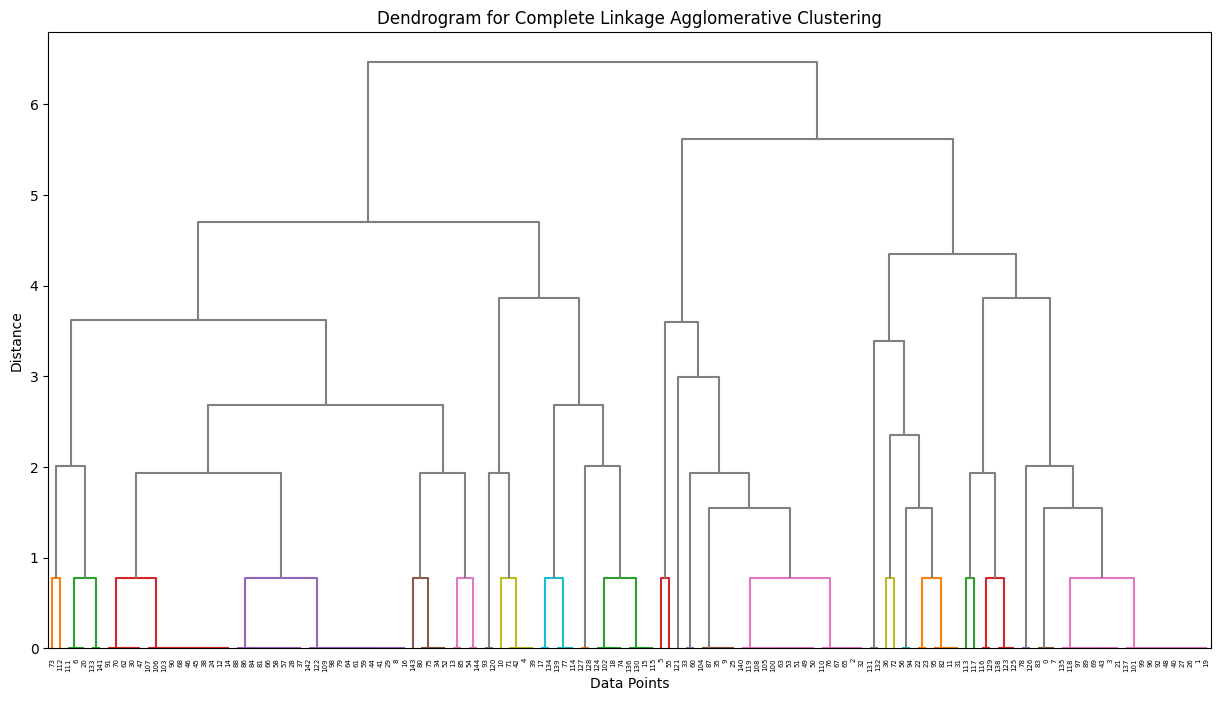

In [39]:
# Complete-Link Agglomerative Clustering (k = 26)

start_time = time.time()

single_link = AgglomerativeClustering(n_clusters=26, linkage='complete', compute_distances=True)
single_link.fit(data_scaled)

labels = single_link.labels_
linked = linkage(data_scaled, method='complete')

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(data_scaled, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=np.arange(len(data_scaled)), truncate_mode="level", p=26, color_threshold=0.2 * max(linked[:, 2]), above_threshold_color='gray')
plt.title("Dendrogram for Complete Linkage Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Execution Time: 0.0036 seconds
Silhouette Score: 0.6633


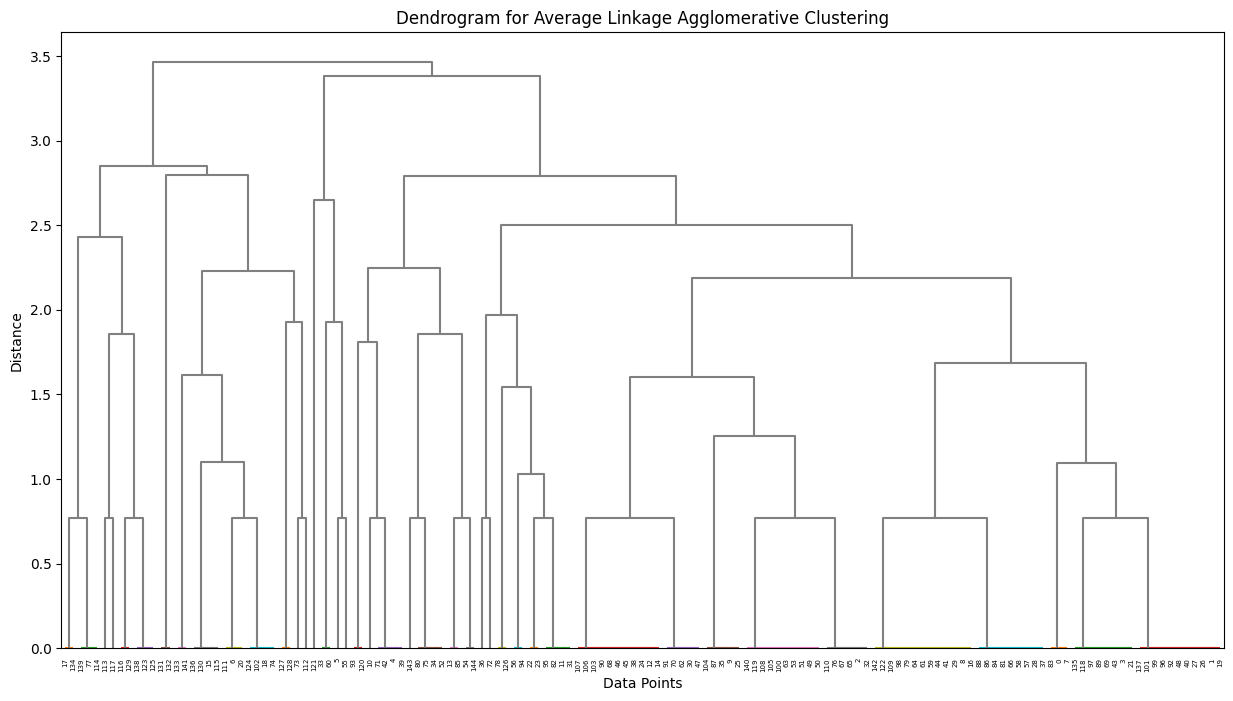

In [40]:
# Average-Link Agglomerative Clustering (k = 22)

start_time = time.time()

single_link = AgglomerativeClustering(n_clusters=22, linkage='average', compute_distances=True)
single_link.fit(data_scaled)

labels = single_link.labels_
linked = linkage(data_scaled, method='average')

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(data_scaled, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=np.arange(len(data_scaled)), truncate_mode="level", p=22, color_threshold=0.2 * max(linked[:, 2]), above_threshold_color='gray')
plt.title("Dendrogram for Average Linkage Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Execution Time: 0.0039 seconds
Silhouette Score: 0.7063


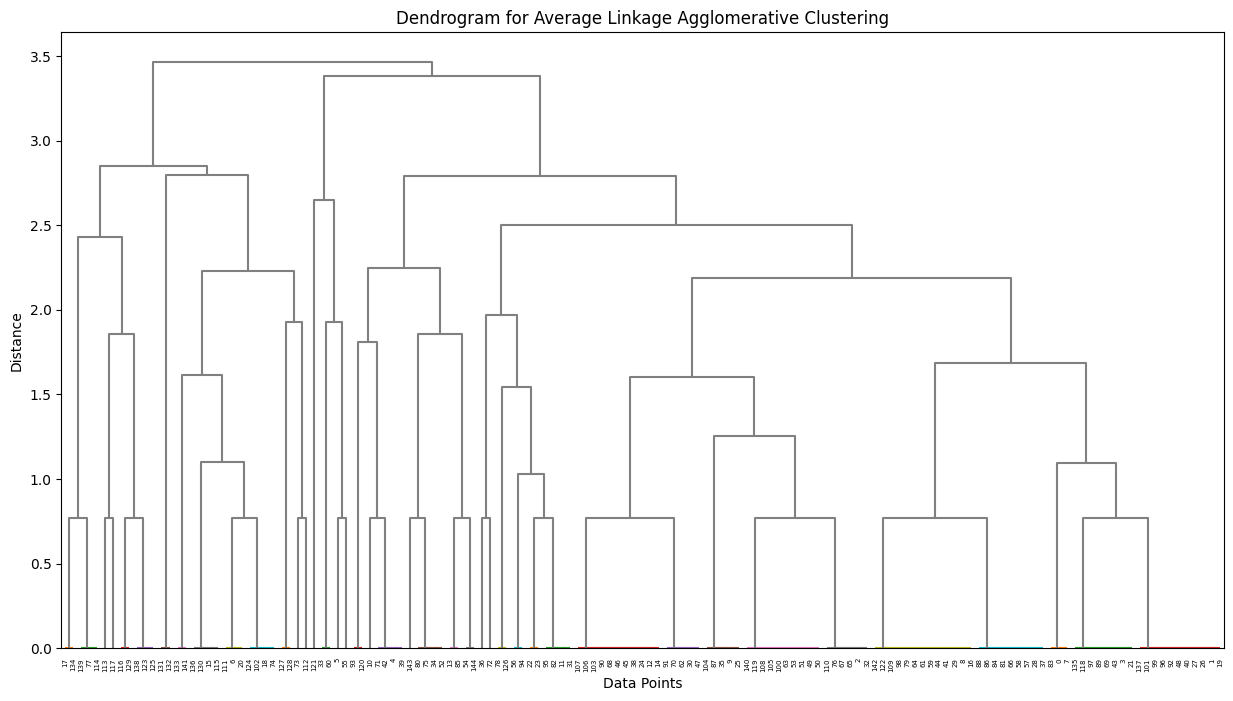

In [41]:
# Average-Link Agglomerative Clustering (k = 26)

start_time = time.time()

single_link = AgglomerativeClustering(n_clusters=26, linkage='average', compute_distances=True)
single_link.fit(data_scaled)

labels = single_link.labels_
linked = linkage(data_scaled, method='average')

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(data_scaled, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=np.arange(len(data_scaled)), truncate_mode="level", p=26, color_threshold=0.2 * max(linked[:, 2]), above_threshold_color='gray')
plt.title("Dendrogram for Average Linkage Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()